# WR_read_examples.ipynb
## Jupyter Notebook demonstrating reading WR data (IWR and LC) and doing simple analysis
### Notebook description

This notebook intends to simplify the use of the 7 year-round weather regimes for the North-Atlantic European region introduced by Grams et al. (2017) [doi:10.1038/nclimate3338](https://doi.org/10.1038/nclimate3338) and updated on ERA5 as described by Hauser et al. (2024) [doi:10.5194/wcd-5-633-2024](https://doi.org/10.5194/wcd-5-633-2024). Christian thanks Sera and Dominik for help with coding this ipynb.

**Part 1** uses fct_wrera_db (V Nov 2020) and fct_wrlcera (V Sep 2019) of Dominik Büeler to read the WR data as explained below. The former reads the simpler file containing IWR time series and the categorical maxIWR and LCattr attributions. The latter generates LC objects.

**Part 2** generates an nice time series plots of IWR, with the active life cycles marked, and a marker for the life cycle attribution.

**Part 3** computes a frequency climatology in a given period and plots the frequency absolute as well as as an anomaly.


author contact: christian.grams@gmx.de

based on templates by: seraphine.hauser@gmx.de and dominik.bueeler@meteoswiss.ch

date: 3 February 2025



# USE OF THIS DATA AND NOTEBOOK:

Please note that at the moment I still try to keep track who is using which version of the data, because I am working on detailed documentation paper. The paper will describe the methodology as well as key characteristics and trends in WR life cycles. With the paper I will make the data freely available. In the mean time I want to be able to update users individually, to ensure they use the correct data. So far the methodology is described in the #LSDPatKIT teams's various papers and initially in Grams et al. 2017  [doi:10.1038/nclimate3338](https://doi.org/10.1038/nclimate3338) (methodology section). Please cite this paper in the meantime and Hauser et al. 2024 [doi:10.5194/wcd-5-633-2024](https://doi.org/10.5194/wcd-5-633-2024) for the slight modifications with the update on ERA5. Until the definition paper is out, please let me know before you share the data beyond your project. 




# Readme for ERA5 year-round 7 regime life cycles. 
## Configuration 

- 1979-2019 reference climatology for Z500 anomaly computation and IWR scaling 
- 10d low-pass filter 
- period 19790111_00 – 20191231_21 used for EOF clustering
- 7 leading EOFs explain 74,4% of variance

### Weather regime indices in correct order

**Index: **           1 6 7 2 4 5 3 0 

**Abbreviation: **    AT ZO ScTr AR EuBL ScBL GL no  

### Data directory

``DATADIR=./ec.era5/eof/update_1950/latwgt/eof_AUTO_Z500_N161_-80E40E30N90N_year/norminput/``

### 90d running mean frequencies and normalization weights

`cd <DATADIR>`

``cat Z0500_N161_Atl_EU2_year_6h_7_10_7_ncl_all_proj_local_nrmfct.txt``


```
    mean and std proj. (Michel and Riviere, 2011) 19790111_00 to 20191231_18
    AT ZO ScTr AR EuBL ScBL GL 
    mean  -0.0023841809 -0.0078344550 -0.0015250760  0.0021150061  0.0042730025  0.0089835953  0.0049633454
    stdv   0.1711293906  0.2818541229  0.2004271448  0.2492269725  0.2292326987  0.2332117558  0.3415428102
```

## Changes to ERA-Interim definition

- normalization weights using the 'lat-weighted spatial mean (in EOF domain) of the grid-point based 30d temporal stddev of Z0500'. This improves summer regime identification.
- EOF-clustering performed for 6h data (insensitive to 6h, 12, 48h time interval) 
- IWR (projection) computed for 3h data
- Z500 normweight for 3,9,15,21 UTC uses normweight of 0,6,12,18 UTC
- Standard abbreviations in filenames (no longer use abbreviations ZOWE, ZOEA, BL)




## Weather regime attribution and IWR files

### Regime Attribution file 

This file is read in by calling `fct_wrera_db.py`.

**ERA5: **`$DATADIR/Z0500_N161_Atl_EU2_year_6h_7_10_7_ncl_all_LCO_local.txt`

```
WR index after Michel and Riviere (2011) of filtered data N161 low pass > 10days, Z0@500, normed: intersection times, OVERLAP LCs allowed
--------------------------------------------------------
Cluster Class Index 1-4:  AT AR GL EuBL ScBL ZO ScTr
--------------------------------------------------------
time in h since 19790101_00| YYYYMMDD_HH| cluster class index| max WR index| lifecycle WR index 
--------------------------------------------------------

     240 19790111_00    7    7    0
     243 19790111_03    0    7    0
     246 19790111_06    7    7    0
     249 19790111_09    0    7    0
     252 19790111_12    7    7    0
     255 19790111_15    0    7    0
```

The file contains 5 columns, the 5th is most relevant:

1. hour since 19790101_00
2. date in yyyymmdd_hh
3. eof attribution -> timestep contributing to cluster XY based on EOFs (only EOF clustering period 11.1.1979-31.12.2019 only for 0 6 12 18 UTC times, other times are "0")
4. max WR index (Michel and Rivière, 2011).  -> based on weather regime projection in physical space
5. LC attribution based on WR index (Michel and Rivière, 2011). -> THIS IS THE LIFECYCLE attribution INCLUDING NO REGIME. USE THIS.

***Regime indices and regime order: *** 

The indices 0-7 refer to the following regimes: NAME (ABBREVIATION IN FILES for ERA5)

0-7: no AT AR GL EuBL ScBL ZO ScTr

0=no regime [only 5th column],
1=Atlantic Trough (AT),
2=Atlantic Ridge (AR),
3=Greenland Blocking (GL),
4=European Blocking (EUBL),
5=Scandinavian Blocking (ScBLL),
6=Zonal regime(ZO=NAO+),
7=Scandinavian Trough(ScTr),

As in this Notebook, please write your code so that the regimes appear sorted in the following way (this will group related regimes). **Please use this order when plotting panels / grouping regimes as well.** Reason: related regimes are grouped next to each other, and cyclonic / blocked are grouped together. In all our papers we use this scheme.

Index re-order:             1 6 7 2 4 5 3 0

Abbreviation:                AT ZO ScTr AR EuBL ScBL GL no

If possible also use the following color codes to colors regimes in plots. Reason again is that the mixed colors reflect relations between regimes, and this is the color scheme we use in all our studies (better intercomparison of studies). An RGB Table and python matplotlib names used for Bueeler et al. 2021 (https://doi.org/10.1002/qj.4178) and Osman et al. 2023 (https://doi.org/10.1002/qj.4512) are listed below and used in this notebook.
You might want to read this file in python.
`wr_metadata_rgb_new_colors.txt`

```
    Long name		        Name	Color		RGB
    Atlantic trough		    AT	    indigo		(75,   0,130)
    Zonal	 		        ZO	    red		    (255,  0,  0)
    Scandinavian trough	    ScTr	darkorange	(255,140,  0)
    Atlantic ridge		    AR	    gold		(255,215,  0)
    European blocking	    EuBL	yellowgreen	(154,205, 50)
    Scandinavian blocking	ScBL	darkgreen	(  0,100,  0)
    Greenland blocking	    GL	    blue		(  0,  0,255)
    No regime 		        no	    grey		(128,128,128) 
```

* * *

### Regime projection vector 

**ERA5: **`$DATADIR/Z0500_N161_Atl_EU2_year_6h_7_10_7_ncl_all_proj_local.txt`

```
WR index after Michel and Riviere (2011) of filtered data N161 low pass > 10days, Z0@500 normed: intersection times
--------------------------------------------------------
Cluster Class Index 1-4:  AT AR GL EuBL ScBL ZO ScTr
--------------------------------------------------------
time in h since 19790101_00, YYYYMMDD_HH, cluster class index, max WR index, WR index for regimes: AT ZO ScTr AR EuBL ScBL GL 
--------------------------------------------------------

     240 19790111_00    7    7   0.86587346   0.75074303   1.35784054  -0.45948577  -1.18579698  -1.07059395  -0.34373909
     243 19790111_03    0    7   0.85441613   0.72267860   1.31580353  -0.44945070  -1.16703987  -1.03862977  -0.32952571
     246 19790111_06    7    7   0.83927369   0.69352823   1.27102554  -0.43822104  -1.14390016  -1.00381625  -0.31613618
     249 19790111_09    0    7   0.82096398   0.66378951   1.22433603  -0.42610571  -1.11709785  -0.96681082  -0.30378893
     252 19790111_12    7    7   0.79906243   0.63312817   1.17505550  -0.41290590  -1.08599937  -0.92708772  -0.29231820
     255 19790111_15    0    7   0.77413946   0.60201460   1.12398231  -0.39892274  -1.05132735  -0.88528168  -0.28191039
     
```

This file contains the projection of instantaneous normalized Z500 anomalies in the WR patterns (7 dimensional WR projection vector) following Michel and Rivière 2011. It better describes a current flow situation in terms of ressemblance to each of the 7 cluster mean EOF patterns. It is used to objectively identify the regime life cycles.

The files contains 11 columns

1. hour since 19790101_00
2. date in yyyymmdd_hh
3. eof attribution -> timestep contributing to cluster XY based on EOFs (only EOF clustering period 11.1.1979-31.12.2019 only for 0 6 12 18 UTC times, other times are "0")
4. max WR index (Michel and Rivière, 2011).  -> based on weather regime projection in physical space
5. to 11. WR index following Michel and Rivière, 2011 **correctly ordered**: AT ZO ScTr AR EuBL ScBL GL

Part 2 generates an example time series plot for 2021 which shows each WR time series and the identified active life cycles (in bold). On the bottom the "dominant active life cycle" is marked. The latter corresponds to the unambigous "LC attribution" (5th column in `Z0500_N161_Atl_EU2_year_6h_7_10_7_ncl_all_LCO_local.txt`) and is the active LC with maximum projection at that time (if two or more LC coexist). 



* * *
## WR lifecycle files

These files are read in by calling `fct_wrlcera.py`.

The files `$DATADIR/Z0500_N81_Atl_EU2_year_6h_7_10_7_ncl_all_LCO_local_cluster[0..7].txt` contain the objective life cycle definition.

The header for regimes 1-7 look as follows, for no regime (index 0) it is reduced and defined differently:

```
WR lifecycle based on projections of filtered data N161 low pass > 10days, Z0@500 normed: intersection times, OVERLAP LCs allowed
Projection P after Michel and Riviere (2011): cos-wgt ano*classmean and WR index: I=(P(t)-avg(P))/std(P(t)
--------------------------------------------------------
 LIFECYCLE for members in Cluster 1
AT
 clsfd EOF : 7958/59860 (13.2944%)
 total mxI : 18275/126376 (14.4608%)
--------------------------------------------------------
number    onset     sat start      mx       sat end     decay        dcfr  dcto dctoID dctoDATE    onfr onto onfrID onfromDATE trfr trfrID trfromDATE trto trtoID trtoDATE 
--------------------------------------------------------

     0 19790518_06 19790525_15 19790526_18 19790527_18 19790530_03     AT   EuBL    1 19790531_06  none    AT -999 19790518_03    AT    0 19790519_03    AT    0 19790529_21
     1 19791209_06 19791211_12 19791212_21 19791213_21 19791215_18     AT   none -999 19791215_21    ZO    ZO    1 19791209_03    ZO    1 19791209_12  none -999 19791215_21
     2 19801020_06 19801020_06 19801023_21 19801027_03 19801027_03     AT   none -999 19801027_06    GL    GL   11 19801020_03    GL   11 19801021_21  none -999 19801027_06
```

### key parameters defining the life cycle

- **number**: exclusive ID of the lifecycle
- **onset**: onset date
- *sat start*: begin of saturation stage date (not used)
- **mx**: maximum stage date
- *sat end*: end of saturation stage date (not used)
- **decay**: decay date

### Transitions within a time window and based on life cycle (use these)

- *dcfr*: regime type of active dominant life cycle at *decay* (not used)
- **dcto**: within 4 days after the decay (dc, dc+96h), type of first active dominant lifecycle or none
- **dctoID**: within 4 days after the decay(dc, dc+96h), ID of first active dominant lifecycle or -999 for none
- **dctoDATE**: within 4 days after the decay(dc, dc+96h), date when the other active dominant lifecycle is identified for the first time. For none this is *dt* after the *decay*
- **onfr**: up to 4 days prior to onset (on-96h,on), type of first (backward looking) active dominant lifecycle or none
- *onto*: regime type of active dominant lifecycle at *onset* (not used)
- **onfrID**: up to 4 days prior to onset (on-96h,on), ID of first active dominant lifecycle or -999 for none
- **onfrDATE**: up to 4 days prior to onset (on-96h,on), date when the other active dominant lifecycle is identified for the first time. For none this is *dt* before the *onset*

### Immediate transitions based on dominant active life cycle (not used)

- *trfr*: regime type of active dominant life cycle when the current life cycle becomes dominant for the first time. It can be the life cycle itself (in the case that max projection is reached for the first time but another projection was larger without contributing to a LC (not persistent enough)).
- *trfrID*: ID of the *trfr* LC
- *trfrDATE*: date when the *trfr* life cycle was dominant for the last time (this is *-dt*h (one time step) before the considered LC becomes dominant for the first time)
- *trto*: regime type of active dominant life cycle when the current life cycle does no longer have the strongest projection for the first time. It can be the life cycle itself (in the case that another regime index is higher but this regime does not become an active life cycles (not persistent enough)).
- *trtoID*: ID of the *trto* LC
- *trtoDATE*: date when the *trto* life cycle is dominant for the first time


### For the no regime two simplified files are contained:

`Z0500_N161_Atl_EU2_year_6h_7_10_7_ncl_all_LCO_local_cluster0_times.txt`: simply all time steps with no regime

`Z0500_N161_Atl_EU2_year_6h_7_10_7_ncl_all_LCO_local_cluster0.txt`: a simplified life cycle file indicating the begin and end of a no regime period.



# Part 1 Read the data

In [1]:
import matplotlib
import os
import numpy as np
import pylab
import time
from datetime import date
from scipy import stats
from scipy import interpolate
from scipy.ndimage import label
from pylab import *
import calendar
import datetime
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import sys

from fct_wrera_db import wrera
from fct_wrlcera_db import wrlcera

#---- function that creates a datelist with increments in hours (variable dt) between two dates d1 and d2 ----
def create_datelist(d1='19500101_00', d2 = '19500101_00',dt=int(3)):
    s               = datetime.datetime.strptime("%s" % (str(d1)), "%Y%m%d_%H")
    e               = datetime.datetime.strptime("%s" % (str(d2)), "%Y%m%d_%H")
    diff            = e - s
    days            = diff.days
    days_to_hours   = days * 24
    diff_two_times  = (diff.seconds) / 3600
    overall_hours   = int(days_to_hours + diff_two_times)
    datelist = []
    for m in range(0, int(overall_hours)+1, int(dt)):
        date        = s + datetime.timedelta(hours=m)
        datelist.append(date.strftime("%Y%m%d_%H"))
        
    return datelist

def str2bool(v):
  return v.lower() in ("yes", "true", "t", "1")



## Configurations for reading data

In [2]:
# path to rawdata
path       = "./"
basepath   = path + "wr_era5_update_1950_latwgt/" #+ "ec.era5/eof/update_1950/latwgt/eof_AUTO_Z500_N161_-80E40E30N90N_year/norminput"

###################################################################
## erainterim
# path       = "./"
# basepath   = path + "erainterim/eof/final15/update/eof_AUTO_Z500_N81_-80E40E30N90N_year/norminput"
## era5
# path       = "./"
# basepath   = path + "ec.era5/eof/update_1950/latwgt/eof_AUTO_Z500_N161_-80E40E30N90N_year/norminput

########################################################################
# keep below the default settings for ERA5 (no changes!)
setup    = 'z500anom_1979_2019_on_wrdef_10d_1.0_1979_2019' # WR configuration (default for era5: 'z500anom_1979_2019_on_wrdef_10d_1.0_1979_2019')

# other variables for call of fct_wrera_db() and fct_wrlcera_db()
start    = '19500111_00'                              # first date considered for reading data must include the period for which a reference climatology shall be computed in in Part 3 (default 1979-2019)
end      = '20250113_21'                              # last date considered

hours    = ['00','03','06','09','12','15','18','21']  # 2-digit hours considered (3hourly for era5)
tformat  = 'string'
setup    = setup
dataset  = 'era5'

dt      = 3 # time step in hours

nwr=7
wrs_l     = ['AT','ZO','ScTr','AR','EuBL','ScBL','GL','no'] # short WR labels in correct order
wrs_label = ["Atlantic trough",    "Zonal regime",\
             "Scandinavian trough","Atlantic ridge",\
             "European blocking",  "Scandinavian blocking",\
             "Greenland blocking","no regime"] # long WR labels

colors_regimes = ["indigo", "red", "darkorange", "gold", "yellowgreen", "darkgreen", "blue", "grey"] # WR colors in correct order

## Part 1: Read all WR data
###  Read wr life cycle data
Creates a dictionary of characteristics for each unique WR life cycle  with the following structure: `datawrlc[key=wr][wrlcID][0:19]`

key=wr: 'AT','ZO','ScTr','AR','EuBL','ScBL','GL'

wrlcID: the ID of the life cycle for regime type wr (continous number)

0:19: encoded as below.

The following characteristic values are given for every individual life cycle:

                [0]:  'number': life cycle id (only unique within the corresponding weather regime),
                [1]:  'onset': date of onset,
                [2]:  'sat_start': date of saturation start,
                [3]:  'mx': date of maximum projection,
                [4]:  'sat_end': date of saturation end,
                [5]:  'decay': date of decay,
                [6]:  'dcfr': of secondary importance; counterpart of onto
                [7]:  'dcto': weather regime active in life cycle within a specified period
                        after decay of current weather regime (counterpart of onfr)
                [8]:  'dctoID': id of life cycle of weather regime in dcto
                [9]:  'dctoDATE': first date of life cycle of weather regime in dcto
                [10]: 'onfr': weather regime active in life cycle within a specified period
                        before onset of current weather regime (counterpart of dcto)
                [11]: 'onto': of secondary importance; counterpart of dcfr
                [12]: 'onfrID': id of life cycle of weather regime in onfr
                [13]: 'onfromDATE': last date of life cycle of weather regime in onfr
                [14]: 'trfr': weather regime active in life cycle before current weather regime
                        becomes active in life cycle (= transition within life cycle vector);
                        difference to onfr: current weather regime does not need to have
                        onset at time of trfr but potentially already before (overlapping
                        life cycles); counterpart to trto
                [15]: 'trfrID': id of life cycle of weather regime in trfr
                [16]: 'trfromDATE': date of transition from trfr to current weather regime
                [17]: 'trto': weather regime active in life cycle after current weather regime
                        ends being active in life cycle (= transition within life cycle vector);
                        difference to dcto: current weather regime does not need to have
                        decay at time of trto but potentially only afterward (overlapping
                        life cycles); counterpart to trfr
                [18]: 'trtoID': id of life cycle of weather regime in trto
                [19]: 'trtoDATE': date of transition from current to trto weather regime
                
for no regime, the following characteristic values are given for every
individual no regime "life cycle":

                [0]: 'number': life cycle id (only unique within the corresponding weather regime),
                [1]: 'onset': date of onset,
                [2]: 'decay': date of decay,
                [3]: 'duration': duration of life cycle in hours,
                [4]: 'comes_from': weather regime active in life cycle before current no regime
                [5]: 'ID_from': id of weather regime in comes_from
                [6]: 'transition_to': weather regime active in life cycle after current no regime
                [7]: 'ID_to': id of weather regime in transition_to

In [3]:
# --------------------------------------------------------------------
# read wr life cycle data
# --------------------------------------------------------------------

print("Read WR LC data")
datawrlc       = wrlcera(wrs_l, start, end, tformat, setup, dataset, basepath)


Read WR LC data


### Read WR time series data

Creates a dictionary `datawr[key]` which contains via key the following: 

            - 'IWR': weather regime index after michel & riviere (2011) with the fields
                   time since 19790101_00 in hours ('tsince'), valid time ('time'),
                   cluster class index ('cci'), and the different
                   weather regime projections ('AT','ZO','ScTr','AR','EuBL','ScBL','GL');
                   note that order of weather regimes in files can change depending on dataset!
            - 'MAXIWR': maximum weather regime index after michel & riviere (2011)
                      with the fields time since 19790101_00 in hours ('tsince'), valid time ('time'),
                      index of maximum weather regime projection ('wrindex'),
                      and name of maximum weather regime projection ('wrname');
                      note that assignment of wrindex to wrname can change depending on dataset!
            - 'LC': full life cycle with the fields time since ('tsince') 19790101_00 in hours,
                  valid time ('time'), index of life cycle ('wrindex'), and name of life cycle ('wrname');
                  
dtimes[:]: array of same length as datawr records, with times in tformat

In [4]:
# --------------------------------------------------------------------
# read wr projections
# --------------------------------------------------------------------

print("Read WR time series")
dtimes, datawr = wrera(start, end, hours, tformat, setup, dataset, basepath)
# --------------------------------------------------------------------
times = [el.decode('UTF-8') for el in datawr['IWR']['time']] # times in string format

Read WR time series


In [15]:
datawr['MAXIWR'][0]

np.void((-253968, b'19500111_00', 5, b'ScBL'), dtype=[('tsince', '<i8'), ('time', 'S11'), ('wrindex', '<i8'), ('wrname', 'S4')])

# Part 2: Plot IWR for all 7 regimes for a given period 

## select the time period to be plotted

In [16]:
# period to plot tseries, and to investigate anomalous WR frequencies in Part 3
start_date = "20240101_00"
end_date   = "20241231_21"

#----- create indices for requested period ----
i1 = times.index(start_date)
i2 = times.index(end_date)
datelist_period=times[i1:i2]


In [17]:
# --------------------------------------------------------------------
# create an IWR timeseries with only the IWR for active life cycles otherwise undef
# needed for later plotting, based on a template by Seraphine Hauser
# --------------------------------------------------------------------
ntimes = len (times)
print(ntimes, " time steps considered from ", start, " to ",end)


# filtered IWR (only data for active LC)
IWRlc      = np.zeros([nwr,ntimes])
IWRlc[:,:] = np.nan

# full IWRs
IWR      = np.zeros([nwr,ntimes])
for w in range(0, nwr):
  IWR[w,:] = datawr['IWR'][wrs_l[w]][:]
  
# assign IWR during active life cycles
for w in range(0,nwr):
    n_lc = len(datawrlc[wrs_l[w]])
    print("WR: ", wrs_l[w], " has ", n_lc, " life cycles.")
    for i in range(0, n_lc):
        #on=datawrlc[wrs_l[w]][i][1].decode()        
        ion = times.index(datawrlc[wrs_l[w]][i][1].decode())
        idc = times.index(datawrlc[wrs_l[w]][i][5].decode())
        IWRlc [w,ion:idc] = IWR[w,ion:idc]


219176  time steps considered from  19500111_00  to  20250113_21
WR:  AT  has  297  life cycles.
WR:  ZO  has  251  life cycles.
WR:  ScTr  has  328  life cycles.
WR:  AR  has  312  life cycles.
WR:  EuBL  has  311  life cycles.
WR:  ScBL  has  307  life cycles.
WR:  GL  has  313  life cycles.


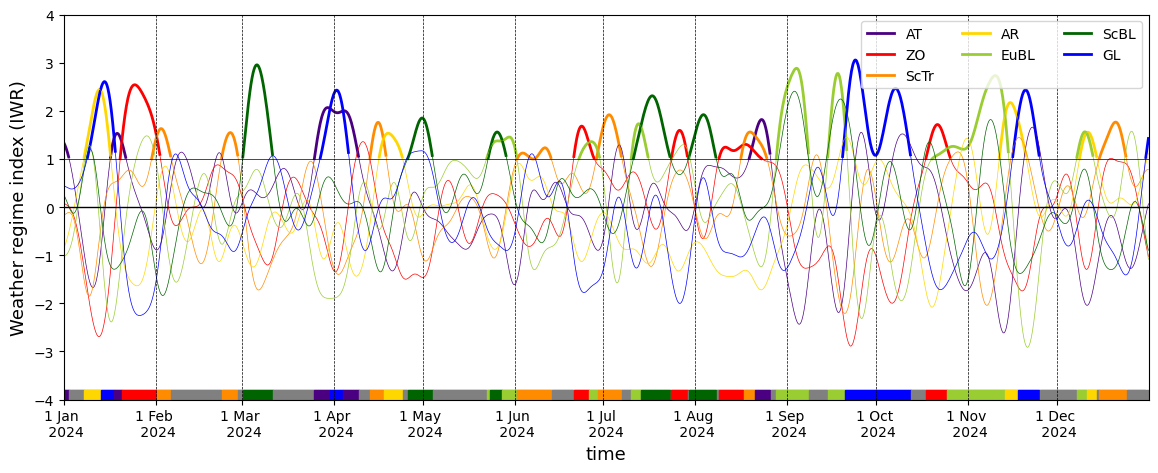

In [18]:
#---- plot figure ------
plt.figure(figsize = (14, 5))
ymin = -4
ymax =  4

time = np.arange(0, len(datelist_period), 1)

# filtered IWR for active LC thick
for i in range(0, nwr):
    plt.plot(time, IWRlc[i,i1:i2], color = colors_regimes[i], linewidth = 2.0, label = wrs_l[i])
    plt.legend(loc = 'upper right', ncol = 3)
# unfiltered IWR thin
for i in range(0, nwr):
    plt.plot(time, IWR[i,i1:i2], color = colors_regimes[i], linewidth = 0.5, label = wrs_l[i])

plt.ylabel("Weather regime index (IWR)", fontsize = 13)
plt.xlabel("time", fontsize = 13)

# mark IWR=0,1 with a horizontal line
plt.hlines(0, len(datelist_period), 0, color = "black", linestyle = "solid", linewidth = 1)
plt.hlines(1, len(datelist_period), 0, color = "black", linestyle = "solid", linewidth = 0.5)

plt.ylim([ymin, ymax])
plt.xlim([0, len(datelist_period)])


# plot filled polygons as a bar of maximum active WR (or none on bottom row) (LCattr)
plt.fill([0,i2-i1,i2-i1,0],[ymin+0.2, ymin+0.2, ymin, ymin],color = "grey")
x1 = i1
y  = [ymin+0.2, ymin+0.2, ymin, ymin]
for i in range(i1,i2): 
    if (datawr['LC'][i+1][2]!= datawr['LC'][i][2]):
        x  = [x1-i1,i-i1,i-i1,x1-i1]
        x1 = i+1
        wr = datawr['LC'][i][3].decode()
        colind = wrs_l.index(wr) 
        plt.fill(x,y,color = colors_regimes[colind])
            
# create ticks every first of a months
ticks = []
tick_labels = []
for i in range(i1,i2+1):    
    dd_hh=dtimes[i].strftime('%d_%H')
    if dd_hh =='01_00':
        ticks.append(i-i1)
        tick_labels.append(dtimes[i].strftime('1 %b \n %Y'))
        plt.vlines(i-i1, ymin, ymax, color = "black", linestyle = "dashed", linewidth = 0.5)

plt.xticks(ticks, labels = tick_labels)

pname = ('%s_tseries_%s_%s.png' % (dataset,start_date, end_date))
plt.savefig(pname,format="png",dpi=150, bbox_inches="tight",facecolor="white")

plt.show()

## Part 3: Frequency anomaly in the given period
### compute climatology

In [19]:
# define the climatological period MMDD_HH in each should reflect the reference season period you want
# to compare to, e.g. 19791201_00-20190228_21 for DJF climatological frequencies 1979-2019
start_clim = '19790101_00' # first date for reference climatology in Part 3 in format YYYYMMDD_HH
end_clim   = '20191231_21' # last date climatology in Part 3


# based on a template by Seraphine Hauser
dstart               = datetime.datetime.strptime(start_clim,'%Y%m%d_%H')
dend                 = datetime.datetime.strptime(end_clim,'%Y%m%d_%H')
nyears               = int(dend.strftime('%Y'))-int(dstart.strftime('%Y'))+1

# annual frequencies
out_clim             = np.zeros([nyears, nwr+2]) #[0]=no regime, 1-7 WR, 8 all time steps 


# count time steps within mmdd_hh period for each year

for i in range(0 +int(dstart.strftime('%Y')), nyears +int(dstart.strftime('%Y'))):
    i1 = times.index("%s%s" %(str(i), dstart.strftime('%m%d_%H')))
    if (int(dstart.strftime('%m'))>int(dend.strftime('%m'))):
        i2 = times.index("%s%s" %(str(i+1), dend.strftime('%m%d_%H')))        
    else:
        i2 = times.index("%s%s" %(str(i), dend.strftime('%m%d_%H')))
    #print(times[i1],times[i2])
    
    n_counts    = np.zeros([nwr+2]) #[0]=no regime, 1-7 WR, 8 all time steps 
    
    LCdata      = datawr['LC']['wrindex'][i1:i2+1]
    LCnamedata  = [el.decode('UTF-8') for el in datawr['LC']['wrname'][i1:i2+1]] 
    

    # count all time steps in year
    n_counts[nwr+1] = i2-i1+1 

    # count no regime time steps and compute frequency in year i
    n_counts[0] = sum(np.where(LCdata==0,1,0))    
    out_clim[i-int(dstart.strftime('%Y')), 0] = (n_counts[0]*100.)/n_counts[nwr+1] 
    
    #print(i, n_counts[1], out_clim[i-int(dstart.strftime('%Y')),0])
    
    for w in range(1,nwr+1): #iterates in wanted WR order as in wrs_l 
    # find first occurrence of wanted wr
        if wrs_l[w-1] in LCnamedata: 
            wrind = LCdata[LCnamedata.index(wrs_l[w-1])]
            n_counts[w] = sum(np.where(LCdata==wrind,1,0))
            #print( wrs_l[w-1], " has index ", wrind)
        else:
            print(wrs_l[w-1], " did not occur in ", i)
    # compute frequency in that year
        out_clim[i -int(dstart.strftime('%Y')), w] = (n_counts[w]*100.)/n_counts[nwr+1] 
        
    out_clim[i -int(dstart.strftime('%Y')), nwr+1] = sum(out_clim[i -int(dstart.strftime('%Y')), 0:nwr+1])   
    #print(i, out_clim[i -int(dstart.strftime('%Y')),0:])

clim         = np.mean(out_clim[1:int(2023-1979),:], axis = 0)
print("climatological frequencies: ",clim)

AR  did not occur in  1979
ZO  did not occur in  2010
ZO  did not occur in  2012
ZO  did not occur in  2017
climatological frequencies:  [ 30.12189582   9.63254173   9.40630146  10.59118151   9.52331527
   9.78617645  11.15199257   9.78659518 100.        ]


### compute frequenciy in selected period

In [20]:
# counts and frequencies in period
n_counts     = np.zeros([nwr+2]) #[0]=no regime, 1-7 WR, 8 all time steps 
out_freq     = np.zeros([nwr+2])

i1 = times.index(start_date)
i2 = times.index(end_date)
print("selected period:", times[i1],times[i2])
    
LCdata      = datawr['LC']['wrindex'][i1:i2+1]
LCnamedata  = [el.decode('UTF-8') for el in datawr['LC']['wrname'][i1:i2+1]] 
    
# count all time steps in year
n_counts[nwr+1] = i2-i1+1 

# count no regime time steps and compute frequency in year i
n_counts[0] = sum(np.where(LCdata==0,1,0))    
out_freq[0] = (n_counts[0]*100.)/n_counts[nwr+1] 
    
for w in range(1,nwr+1): #iterates in wanted WR order as in wrs_l 
# find first occurrence of wanted wr
    if wrs_l[w-1] in LCnamedata: 
        wrind = LCdata[LCnamedata.index(wrs_l[w-1])]
        n_counts[w] = sum(np.where(LCdata==wrind,1,0))
    else:
        print(wrs_l[w-1], " did not occur in ", i)
    # compute frequency in that year
    out_freq[w] = (n_counts[w]*100.)/n_counts[nwr+1] 
out_freq[nwr+1] = sum(out_freq[0:nwr+1]) 
#print(out_freq)

anomalies = np.zeros([9])

for k in range(0, 9):
    anomalies[k] = out_freq[k] - clim[k]

#print(anomalies)

selected period: 20240101_00 20241231_21


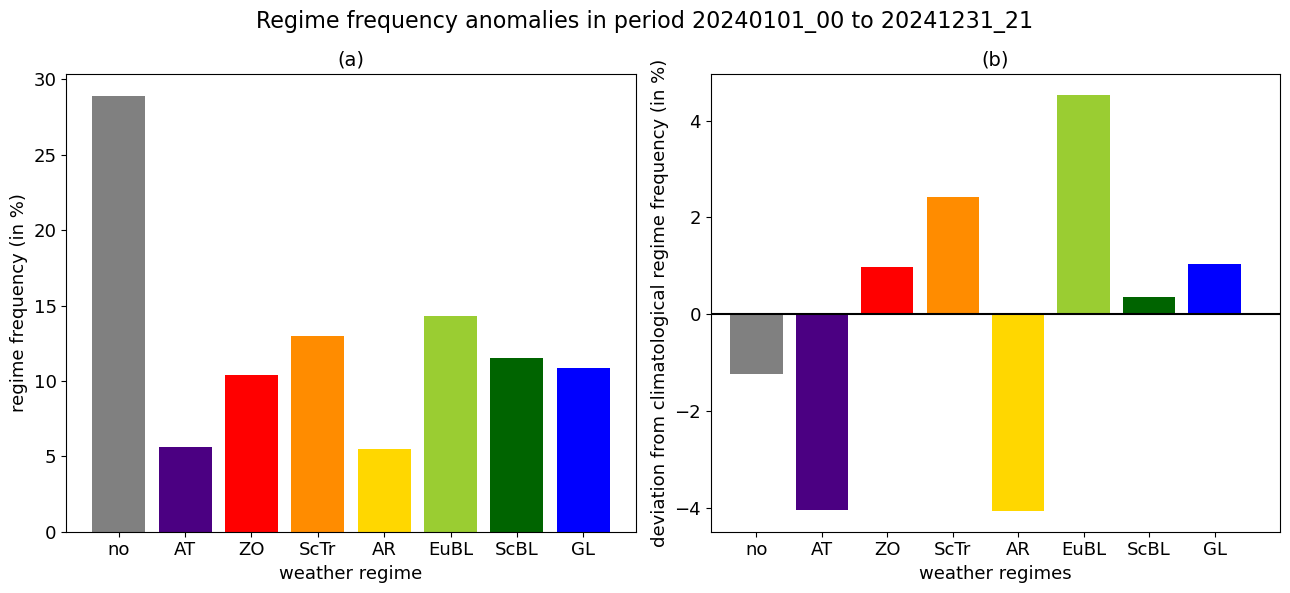

In [21]:
# Create a figure with two subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))


colors = ['grey']+colors_regimes[0:nwr]
wrs    = ['no']+wrs_l[0:nwr]

fig.suptitle (("Regime frequency anomalies in period %s to %s" % (start_date, end_date)), fontsize=16)

# Plot positive values as vertical bars in the left subplot
ax1.bar(range(len(out_freq)-1), out_freq[0:nwr+1], color=colors)
ax1.set_xlabel('weather regime', fontsize = 13)
ax1.set_ylabel('regime frequency (in %)', fontsize = 13)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.tick_params(axis='both', which='minor', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='minor', labelsize=13)

# Plot anomalies (positive and negative) as vertical bars in the right subplot

ax2.bar(range(len(anomalies)-1), anomalies[0:nwr+1], color=colors)
ax2.set_xlabel('weather regimes', fontsize = 13)
ax2.set_ylabel('deviation from climatological regime frequency (in %)', fontsize = 13)
ax2.hlines(0, -0.7, 9.5, linestyle = "solid", color = "black")
ax2.set_xlim(xmin=-0.7)
ax2.set_xlim(xmax=8)

ax1.set_xticks([0,1,2,3,4,5,6,7])
ax1.set_xticklabels(wrs, rotation=0, fontsize=13,ha='center')
ax2.set_xticks([0,1,2,3,4,5,6,7])
ax2.set_xticklabels(wrs, rotation=0, fontsize=13,ha='center')

ax1.set_title("(a)", fontsize = 14)
ax2.set_title("(b)", fontsize = 14)

# Adjust layout
plt.tight_layout()


pname = ('%s_freqano_%s_%s.png' % (dataset,start_date, end_date))
plt.savefig(pname,format="png",dpi=150, bbox_inches="tight",facecolor="white")

# Show plot
plt.show()